In [1]:
import sys  
sys.path.insert(1, '../')

from src.models.vit_cnn_gusa import ViT_CNN_GuSA
from utils.loader import Loader
from utils.transform import transform
from src.visualization.visualize_attention import visualize_attention
# import some libraries
import torch
import math
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt

## Loading the model :

In [2]:
model=ViT_CNN_GuSA(num_classes=4,device="cpu",backbone_name='vit_base',patch_size=8,freeze_backbone=True,pretraining_method="dino",n_features=1)

## Loading the demo image :
you can upload a new image by clicking on the "Upload" button


In [3]:
img=Image.open('../data/image/image_1.jpg')

In [4]:
loader = Loader()

FileUpload(value={}, accept='image/*', description='Upload')

Uncomment the following cell if you want to use the uploaded image :

In [5]:
# img = loader.getLastImage()

In [6]:
img_transformed=transform(img,img_size=(img.size[0]//4,img.size[1]//4),patch_size=8).unsqueeze(0)

In [7]:
img_transformed.shape

torch.Size([1, 3, 256, 256])

In [8]:
with torch.no_grad():
    model.eval()
    output,roi=model(img_transformed)

In [9]:
with torch.no_grad():
    model.eval()
    interm_layers=model.backbone.model.get_intermediate_layers(img_transformed,n=1)

In [10]:
X=torch.cat(interm_layers,dim=-1)[:,1:]
print(X.shape)
X=X.reshape(X.shape[0],math.isqrt(X.shape[1]),math.isqrt(X.shape[1]),X.shape[-1])
print(X[:,:,:,0].max())

torch.Size([1, 1024, 768])
tensor(5.3433)


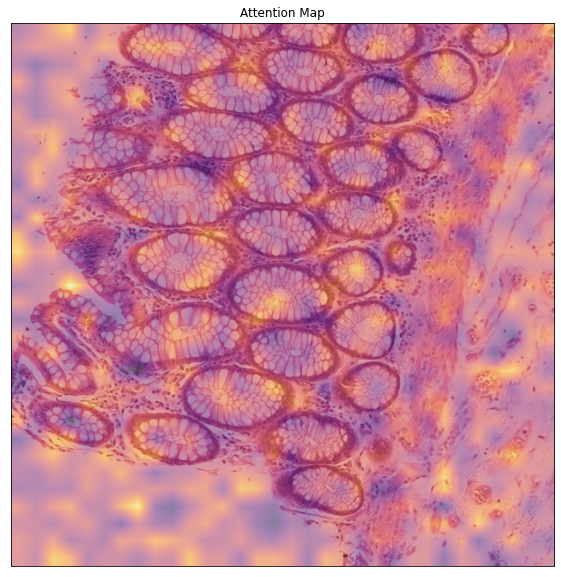

In [11]:
visualize_attention(figsize=(10,10),image=img,rois=[roi],show_original=True)